In [1]:
from IPython import get_ipython;   
get_ipython().magic('reset -sf')
#https://github.com/kirbs-/hide_code

# Machine Learning

In [5]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import feature_selection as fs
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [11]:
ds = pd.read_csv('S1SubAct_B_m_NoDupes.csv', index_col = "duration")
ds.reset_index(drop = True, inplace = True)

In [12]:
ds.head()

,bathroom_toiletflush,bathroom_lightswitch,foyer_lightswitch,kitchen_lightswitch,kitchen_burner,livingroom_lightswitch,bedroom_lightswitch,kitchen_coffeemachine,kitchen_drawer,kitchen_refrigerator,...,bathroom_sinkfaucet-hot,kitchen_dishwasher,livingroom_lamp,study_drawer,bathroom_sinkfaucet-cold,kitchen_laundrydryer,study_lightwitch,bathroom_showerfaucet,bathroom_exhaustfan,kitchen_garbagedisposal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## This is for TOASTER - can we please have a loop that does all the below steps 

In [13]:
Data = ds.drop(columns = 'kitchen_toaster').values   #
target = ds['kitchen_toaster']                       #

In [14]:
D_train, D_test, t_train, t_test = train_test_split(Data, 
                                                    target, 
                                                    test_size = 0.3,
                                                    random_state=999)

In [15]:
dt_classifier = DecisionTreeClassifier(max_depth=4,
                                       criterion='entropy',
                                       random_state = 999)

In [16]:
dt_classifier.fit(D_train, t_train);

In [17]:
dt_classifier.score(D_test, t_test)

0.9886506935687264

In [18]:
cv_method = RepeatedStratifiedKFold(n_splits = 5, 
                                    n_repeats = 3, 
                                    random_state = 999)

dt_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [2, 3, 4, 5]}

gs = GridSearchCV(estimator=dt_classifier, 
                  param_grid=params_DT, 
                  cv=cv_method,
                  verbose=1, 
                  scoring='accuracy')

In [19]:
print(gs.fit(Data, target))
print(gs.best_params_)
print(gs.best_score_)

Fitting 15 folds for each of 8 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x128973910>,
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=999,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.0s finished


In [22]:
import altair as alt

def plot_imp(best_features, scores, method_name, color):
    
    df = pd.DataFrame({'features': best_features, 
                       'importances': scores})
    
    chart = alt.Chart(df, 
                      width=500, 
                      title=method_name + ' Feature Importances'
                     ).mark_bar(opacity=0.95, 
                                color=color).encode(
        alt.X('features', title='Feature', sort=None, axis=alt.AxisConfig(labelAngle=45)),
        alt.Y('importances', title='Importance')
    )
    
    return chart

### Feature Selection Using Mutual Information

The mutual information method is a filter feature selection method that looks at the relationship between each descriptive feature and the target feature using the concept of entropy.

The code below returns the indices of the 5 features that have the highest mutual information value. As in the F-score method, the wrapper is not used in any way when selecting features using the mutual information method.

In [29]:
num_features = 5
fs_fit_mutual_info = fs.SelectKBest(fs.mutual_info_classif, k=num_features)
fs_fit_mutual_info.fit_transform(Data, target)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:num_features]
best_features_mutual_info = ds.columns[fs_indices_mutual_info].values
best_features_mutual_info

array(['kitchen_cabinet', 'livingroom_lightswitch', 'study_drawer',
       'bathroom_showerfaucet', 'kitchen_toaster'], dtype=object)

In [30]:
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.00566719, 0.00345697, 0.00268585, 0.00265539, 0.00254629])

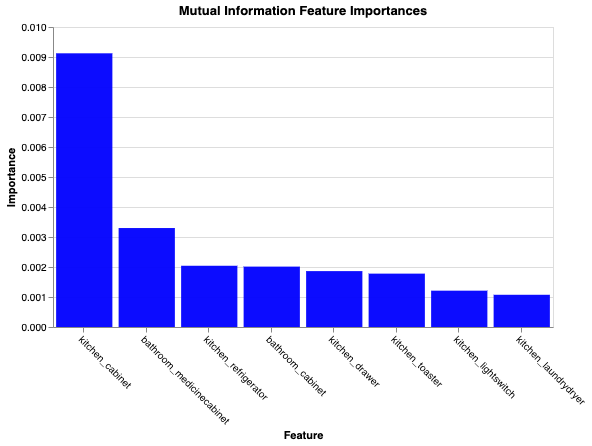

In [28]:
plot_imp(best_features_mutual_info, feature_importances_mutual_info, 'Mutual Information', 'blue')

In [ ]:
# import datetime as dt
# def add_DAY_WDWE_phaseII(ds):
#     dayNumKeyWithDAYDict = pd.Series(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], ['0','1','2','3','4','5','6']).to_dict()
#     dayNumKeyWithWDWEDict = pd.Series(['WD','WD','WD','WD','WD','WE','WE'], ['0','1','2','3','4','5','6']).to_dict()
#     ds.set_index(ds['timestamp'], inplace = True)
#     ds.insert((len(ds.columns)), "DAY", ds.index.dayofweek.astype(str), True)
#     ds.insert((len(ds.columns)), "WDWE", ds.index.dayofweek.astype(str), True)
#     ds = ds.replace({"DAY": dayNumKeyWithDAYDict})
#     ds = ds.replace({"WDWE": dayNumKeyWithWDWEDict})
#     ds.reset_index(drop = True, inplace = True)
#     ds['Hour'] = ds['timestamp'].dt.hour
#     return ds

# df = add_DAY_WDWE_phaseII(df)
# df.head()

In [ ]:
# df['Phase'] = "Afternoon"
# df.loc[df['Hour'] < 9, 'Phase'] = "Morning"
# df.loc[df['Hour'] >= 17, 'Phase'] = "Evening"
# df.head()

## Can we please also have summary stats - for example, 'Washine Machine on WD morning has a mean value of X with a SD of Y'

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import feature_selection as fs
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
import datetime as dt

df = pd.read_csv('S1Act_B_m_NoDupes.csv', index_col = "duration")
df.reset_index(drop = True, inplace = True)

df_sensors = pd.read_csv('S1Sensors_preprocessed.csv', index_col = None)
df_sensors = df_sensors[df_sensors.reqEnergy]

df_costs = pd.read_csv('power_costs.csv', index_col = None)

def add_DAY_WDWE_phaseII(ds):
    dayNumKeyWithDAYDict = pd.Series(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], ['0','1','2','3','4','5','6']).to_dict()
    dayNumKeyWithWDWEDict = pd.Series(['WD','WD','WD','WD','WD','WE','WE'], ['0','1','2','3','4','5','6']).to_dict()
    ds.set_index(ds['timestamp'], inplace = True)
    ds.insert((len(ds.columns)), "DAY", ds.index.dayofweek.astype(str), True)
    ds.insert((len(ds.columns)), "WDWE", ds.index.dayofweek.astype(str), True)
    ds = ds.replace({"DAY": dayNumKeyWithDAYDict})
    ds = ds.replace({"WDWE": dayNumKeyWithWDWEDict})
    ds.reset_index(drop = True, inplace = True)
    ds['Hour'] = ds['timestamp'].dt.hour
    return ds

In [ ]:
#Assuming everything that is common has been pre-processed by this stage

def calc_subAct(dataframe, subAct, wattage, df_costs):
    # Duplicate the DF to avoid corrupting it
    df = dataframe.copy()
    
    # First step is to train the classifier
    Data = df.drop(columns = subAct).values
    target = df[subAct]
    D_train, D_test, t_train, t_test = train_test_split(Data, 
                                                        target, 
                                                        test_size = 0.3,
                                                        random_state=999)
    dt_classifier = DecisionTreeClassifier(max_depth=4,
                                           criterion='entropy',
                                           random_state = 999)
    dt_classifier.fit(D_train, t_train)
    confidence = dt_classifier.score(D_test, t_test)
    df['prediction'] = dt_classifier.predict(Data)
    df['intervention'] = (df['prediction'].diff() == -1) & (df[subAct] == 1)
    
    dfIDX = pd.read_csv('S1Act_B_m_NoDupes.csv', index_col = None)
    dfIDX.duration = pd.to_datetime(dfIDX.duration, format='%Y-%m-%d %H:%M:%S')
    df['timestamp'] = dfIDX['duration']

    df = add_DAY_WDWE_phaseII(df)
    df['Phase'] = "Afternoon"
    df.loc[df['Hour'] < 12, 'Phase'] = "Morning"
    df.loc[df['Hour'] >= 18, 'Phase'] = "Evening"
    
    # Calculate approx durations
    duration = 0
    duration_col = []

    for row in df.iterrows():
        if row[1][subAct] == 1:
            duration += 1
        else:
            duration = 0

        duration_col.append(duration)

    df['duration'] = duration_col

    cancelled_interventions = 0
    completed_interventions = 0
    possible_intervention = False
    intervening = False

    total_minutes_saved = 0
    total_kwh_saved = 0
    total_dollars_saved = 0

    for row in df.iterrows():
        if row[1]['intervention'] and not intervening:
            possible_intervention = True
        if possible_intervention:
            if row[1][subAct] == 0:
                possible_intervention = False
                cancelled_interventions += 1
            else:
                if row[1]['duration'] > benchmark_usage[subAct][row[1]['WDWE']][row[1]['Phase']] / 60:
                    intervening = True
                    completed_interventions += 1
                    possible_intervention = False
        if intervening:
            if row[1][subAct] == 0:
                intervening = False
            else:
                total_minutes_saved += 1
                kwh_saved = wattage / 60
                total_kwh_saved += kwh_saved
                hour = row[1]['Hour']
                wdwe = row[1]['WDWE']
                rate = df_costs[(df_costs['Hour'] == hour) & (df_costs['WDWE'] == wdwe)].iloc[0]['cost_per_kwh']
                dollars_saved = rate * kwh_saved
                total_dollars_saved += dollars_saved

    # We see that we didn't quite save as many minutes of electricity but we likely annoyed the user less
    # Note that this means our 'confidence' value is going to be more conservative than it needs to be
    print("SubAct:",subAct)
    print("Classifier confidence:", confidence)
    print("Number of completed interventions:", completed_interventions)
    print("Number of interventions cancelled due to not meeting average number of minutes usage:", 
          cancelled_interventions)
    print("Total minutes saved:", total_minutes_saved)
    print("Total minutes saved, accounting for confidence:", total_minutes_saved * confidence)
    print("Total electricity saved (kwh):", total_kwh_saved)
    print("Total electricity saved, accounting for confidence (kwh):", total_kwh_saved * confidence)
    print("Total money saved: $", total_dollars_saved)
    print("Total money saved accounting for confidence:  $", total_dollars_saved * confidence)
    print()
    

for row in df_sensors.iterrows():
    subAct = row[1]['concat']
    wattage = row[1]['wattage']
    calc_subAct(df, subAct, wattage, df_costs)

# Discussion

<img src="https://ourworldindata.org/uploads/2013/12/Satellite-images-of-India-by-night-–-Sala-I-Martin-paper-750x480.png" alt="Satellite-images-of-India-by-night-–-Sala-I-Martin-paper" class="wp-image-7749" srcset="https://ourworldindata.org/uploads/2013/12/Satellite-images-of-India-by-night-–-Sala-I-Martin-paper-750x480.png 750w, https://ourworldindata.org/uploads/2013/12/Satellite-images-of-India-by-night-–-Sala-I-Martin-paper-150x96.png 150w, https://ourworldindata.org/uploads/2013/12/Satellite-images-of-India-by-night-–-Sala-I-Martin-paper-400x256.png 400w, https://ourworldindata.org/uploads/2013/12/Satellite-images-of-India-by-night-–-Sala-I-Martin-paper-768x491.png 768w" sizes="(max-width: 750px) 100vw, 750px">

In [ ]:
# !jt -l
# !jt -t <theme>
# !jt -r